# <font color = "red">  Predicting Crime Rate In Chicago Using Facebook's Prochet </font> <font color = "darkgreen"> *By Harshit Dawar*</font>

## <font color = "brown"> Information about Dataset

 - The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017. 
- Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.
- Dataset contains the following columns: 
    - ID: Unique identifier for the record.
    - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - Date: Date when the incident occurred.
    - Block: address where the incident occurred
    - IUCR: The Illinois Unifrom Crime Reporting code.
    - Primary Type: The primary description of the IUCR code.
    - Description: The secondary description of the IUCR code, a subcategory of the primary description.
    - Location Description: Description of the location where the incident occurred.
    - Arrest: Indicates whether an arrest was made.
    - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
    - District: Indicates the police district where the incident occurred. 
    - Ward: The ward (City Council district) where the incident occurred. 
    - Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas. 
    - FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
    - X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Year: Year the incident occurred.
    - Updated On: Date and time the record was last updated.
    - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.
- Datasource: https://www.kaggle.com/currie32/crimes-in-chicago

### <font color = "brown"> Instructions for installation of *fbprochet* package

- Install it by pip install fbprophet
- Otherwise, install it by conda install -c conda-forge fbprophet
- Prophet is a tool to forecast time series data based on additive model in which non-linear trends are fit based on fixed time.
- For more information, visit: https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


## <font color = "Brown"> Importing Required Libraries 

In [2]:
from fbprophet import Prophet as Pro
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## <font color = "Brown"> Importing Dataset 

In [3]:
df1 = pd.read_csv("Chicago_Crimes_2005_to_2007.csv", error_bad_lines = False)  
df2 = pd.read_csv("Chicago_Crimes_2008_to_2011.csv", error_bad_lines = False)
df3 = pd.read_csv("Chicago_Crimes_2012_to_2017.csv", error_bad_lines = False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [4]:
df1.shape, df2.shape, df3.shape

((1872343, 23), (2688710, 23), (1456714, 23))

In [5]:
chicago_dataset = pd.concat([df1,df2,df3])      # Concatenating all the dataframes

In [6]:
chicago_dataset.shape

(6017767, 23)

## <font color = "Brown"> PreProcessing Dataset 

In [7]:
chicago_dataset.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


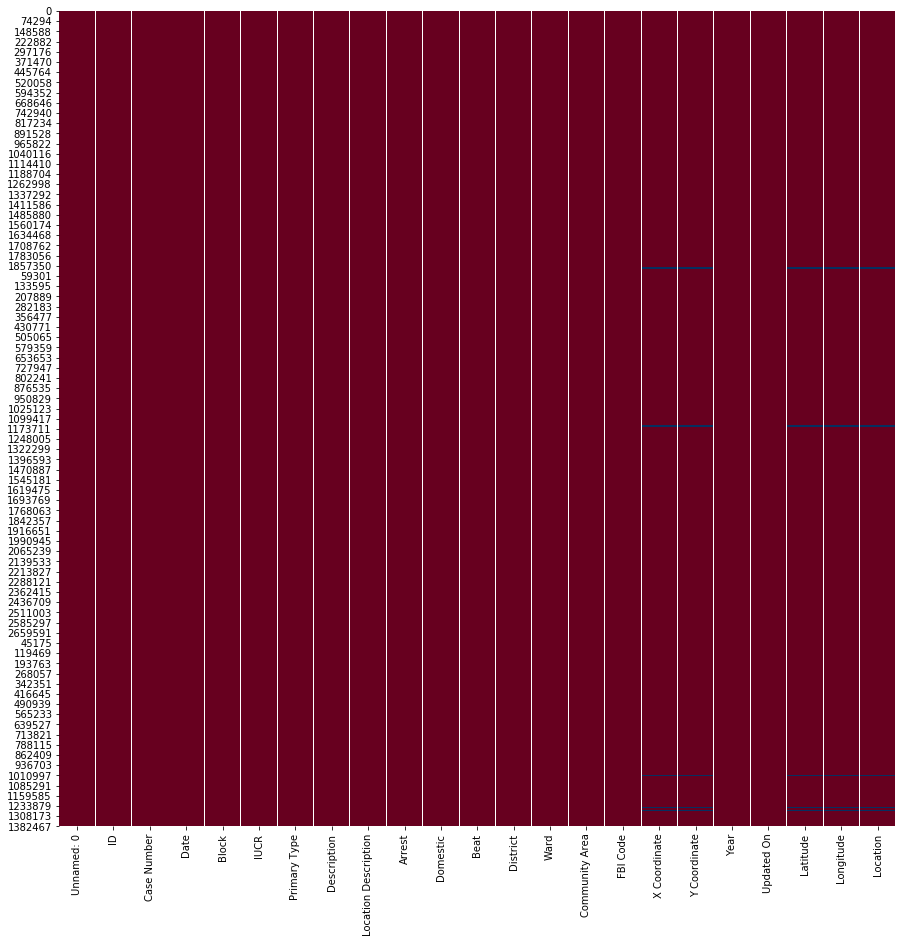

In [8]:
plt.figure(figsize = (15,15))
sns.heatmap(chicago_dataset.isnull(), cbar = False, cmap = "RdBu")
plt.show()

In [9]:
formatted_DF = chicago_dataset.drop(["Unnamed: 0", "ID", "Case Number", "IUCR", "X Coordinate", "Y Coordinate", "Updated On", "Year", "Latitude", "Longitude", "Beat", "Location", "FBI Code", "Ward"], axis = 1)


In [10]:
chicago_dataset.keys()


Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [11]:
formatted_DF.keys()

Index(['Date', 'Block', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'District', 'Community Area'],
      dtype='object')

In [12]:
formatted_DF.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,16.0,11.0
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,3.0,42.0
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,3.0,69.0
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False,16.0,17.0
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,8.0,65.0


In [13]:
formatted_DF.shape

(6017767, 9)

In [15]:
# Changing the DateTime format

formatted_DF.Date = pd.to_datetime(formatted_DF.Date, format = "%m/%d/%Y %I:%M:%S %p")  

In [16]:
# Setting the Index of the dataset to DateTimeIndex

formatted_DF.index = pd.DatetimeIndex(formatted_DF.Date)

In [17]:
formatted_DF.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area
Date,,,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,16.0,11.0
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,3.0,42.0
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,3.0,69.0
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False,16.0,17.0
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,8.0,65.0


## <font color = "Brown"> Visualizing Data

In [18]:
# Will show number of crimes of each category

formatted_DF["Primary Type"].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [19]:
# Setting starting 20 types of crimes and locations of crimes.

order_data = formatted_DF["Primary Type"].value_counts().iloc[:20].index
order_data1 = formatted_DF["Location Description"].value_counts().iloc[:20].index

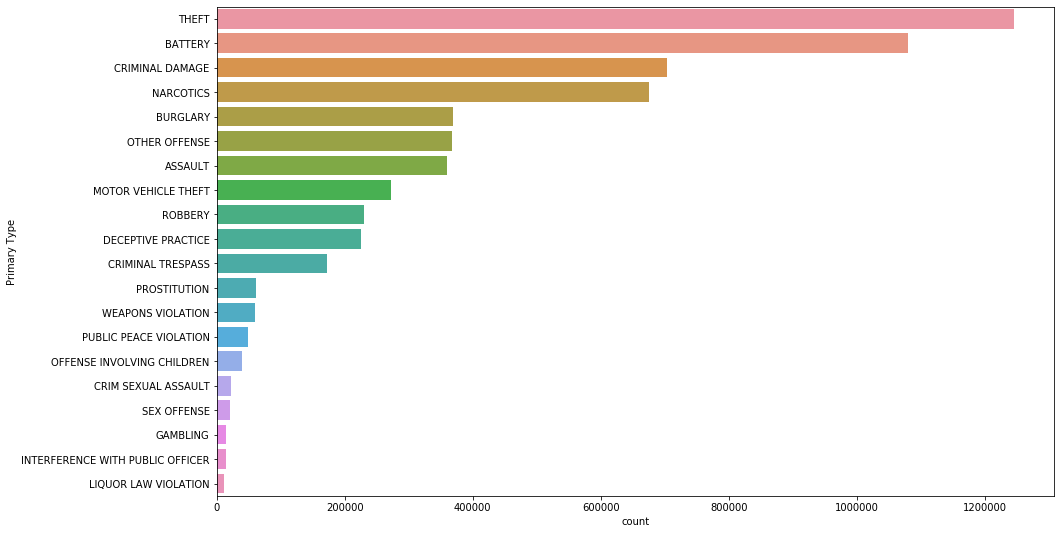

In [20]:
# Plotting types of "Crimes VS Their Count"

plt.figure(figsize = (15,9))
sns.countplot(y = "Primary Type", data = formatted_DF, order = order_data)
plt.show()

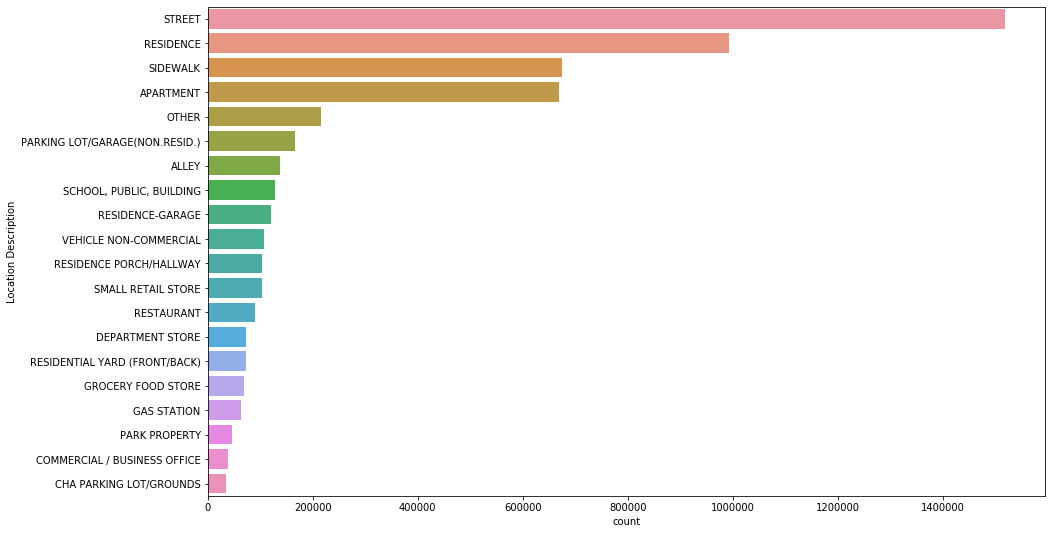

In [21]:
# Plotting types of "Location Of Crimes VS Their Count"

plt.figure(figsize = (15,9))
sns.countplot(y = "Location Description", data = formatted_DF, order = order_data1)
plt.show()

In [22]:
# Show number of crimes Year Wise

formatted_DF.resample("Y").size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

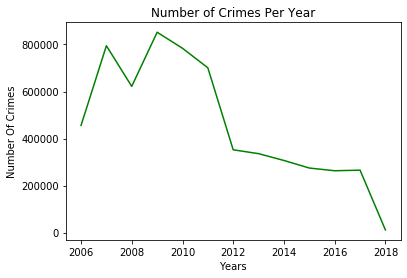

In [23]:
plt.plot(formatted_DF.resample("Y").size(), c = "Green")
plt.title("Number of Crimes Per Year")
plt.xlabel("Years")
plt.ylabel("Number Of Crimes")
plt.show()

In [24]:
# Show number of crimes Month Wise

formatted_DF.resample("M").size()

Date
2005-01-31    33983
2005-02-28    32042
2005-03-31    36970
2005-04-30    38963
2005-05-31    40572
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: M, Length: 145, dtype: int64

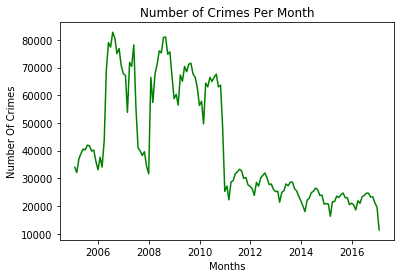

In [25]:
plt.plot(formatted_DF.resample("M").size(), c = "Green")
plt.title("Number of Crimes Per Month")
plt.xlabel("Months")
plt.ylabel("Number Of Crimes")
plt.show()

In [26]:
# Show number of crimes Quarterly

formatted_DF.resample("Q").size()

Date
2005-03-31    102995
2005-06-30    119769
2005-09-30    123550
2005-12-31    109497
2006-03-31    115389
2006-06-30    225489
2006-09-30    238423
2006-12-31    215383
2007-03-31    192791
2007-06-30    204361
2007-09-30    119086
2007-12-31    105610
2008-03-31    191523
2008-06-30    222331
2008-09-30    236695
2008-12-31    201504
2009-03-31    184055
2009-06-30    203916
2009-09-30    210446
2009-12-31    185483
2010-03-31    171848
2010-06-30    194453
2010-09-30    197116
2010-12-31    137274
2011-03-31     78167
2011-06-30     93064
2011-09-30     95835
2011-12-31     85000
2012-03-31     78574
2012-06-30     88283
2012-09-30     89685
2012-12-31     79128
2013-03-31     71651
2013-06-30     80776
2013-09-30     83510
2013-12-31     70766
2014-03-31     59964
2014-06-30     72991
2014-09-30     76090
2014-12-31     65482
2015-03-31     58503
2015-06-30     68239
2015-09-30     71782
2015-12-31     64471
2016-03-31     60843
2016-06-30     68085
2016-09-30     72500
2016-12-

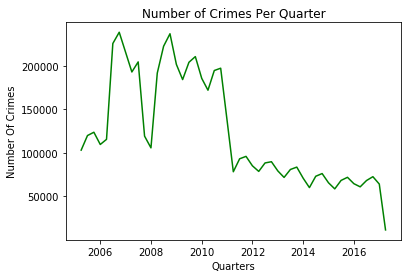

In [27]:
plt.plot(formatted_DF.resample("Q").size(), c = "Green")
plt.title("Number of Crimes Per Quarter")
plt.xlabel("Quarters")
plt.ylabel("Number Of Crimes")
plt.show()

## <font color = "Brown">Preparing Dataset

In [35]:
# Using Prophet

formatted_chicago = formatted_DF.resample("M").size().reset_index()

In [41]:
formatted_chicago.keys()

Index(['Date', 0], dtype='object')

In [42]:
# Adding name to Column named 0.

formatted_chicago.columns = ["Date", "Number_Of_Crimes"]

In [45]:
formatted_chicago.keys()

Index(['Date', 'Number_Of_Crimes'], dtype='object')

In [66]:
# Creating final dataset.

formatted_chicago_final = formatted_chicago.rename(columns = {"Number_Of_Crimes" : "y", "Date" : "ds"})

In [67]:
formatted_chicago_final.keys()

Index(['ds', 'y'], dtype='object')

## <font color = "Brown"> Creating Model

In [91]:
model = Pro()

In [92]:
model.fit(formatted_chicago_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [93]:
# Periods allows to make prediction of future(1 year in future in this case).

future = model.make_future_dataframe(periods = 365)    
prediction = model.predict(future)

In [94]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60424.697099,37997.161255,71609.094231,60424.697099,60424.697099,-4822.510798,-4822.510798,-4822.510798,-4822.510798,-4822.510798,-4822.510798,0.0,0.0,0.0,55602.186301
1,2005-02-28,60293.923673,32691.003071,66664.823552,60293.923673,60293.923673,-9495.561623,-9495.561623,-9495.561623,-9495.561623,-9495.561623,-9495.561623,0.0,0.0,0.0,50798.362050
2,2005-03-31,60149.138810,41842.708956,77157.540675,60149.138810,60149.138810,-1257.338280,-1257.338280,-1257.338280,-1257.338280,-1257.338280,-1257.338280,0.0,0.0,0.0,58891.800529
3,2005-04-30,60009.024425,43071.229999,79121.784015,60009.024425,60009.024425,1121.350769,1121.350769,1121.350769,1121.350769,1121.350769,1121.350769,0.0,0.0,0.0,61130.375194
4,2005-05-31,59864.239561,47344.694582,82047.252781,59864.239561,59864.239561,5414.419192,5414.419192,5414.419192,5414.419192,5414.419192,5414.419192,0.0,0.0,0.0,65278.658753


## <font color = "Brown"> Visualizing Model

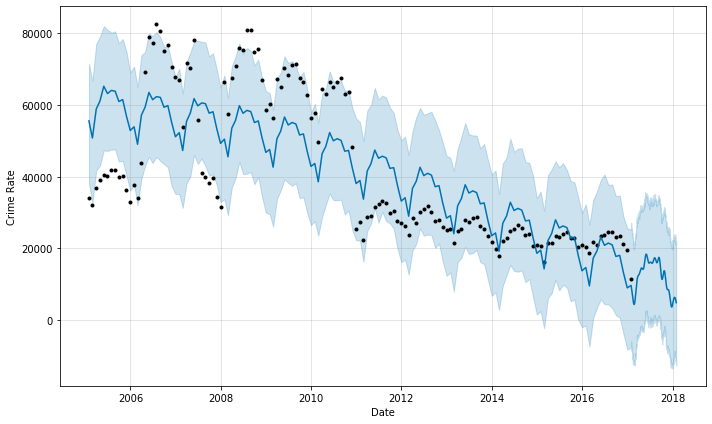

In [95]:
pred_plot = model.plot(prediction, xlabel = "Date", ylabel = "Crime Rate")

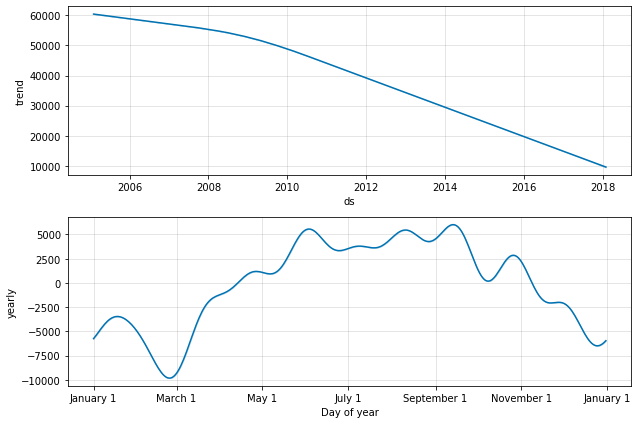

In [77]:
figure = model.plot_components(prediction)

In [82]:
# Periods allows to make prediction of future(2 year in future in this case).

future2 = model.make_future_dataframe(periods = 730)    
prediction2 = model.predict(future2)

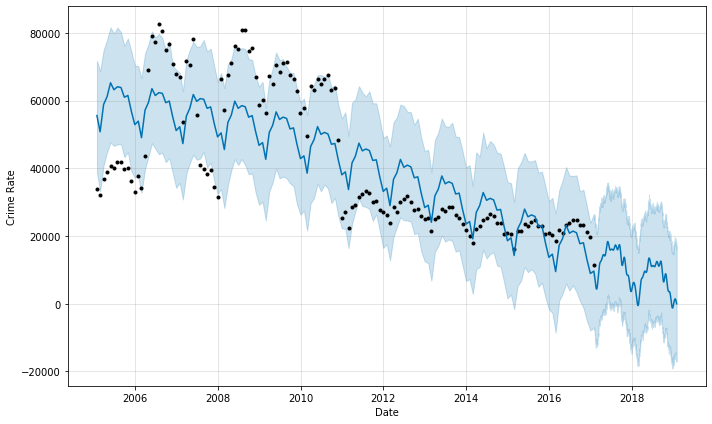

In [83]:
pred_plot2 = model.plot(prediction2, xlabel = "Date", ylabel = "Crime Rate")

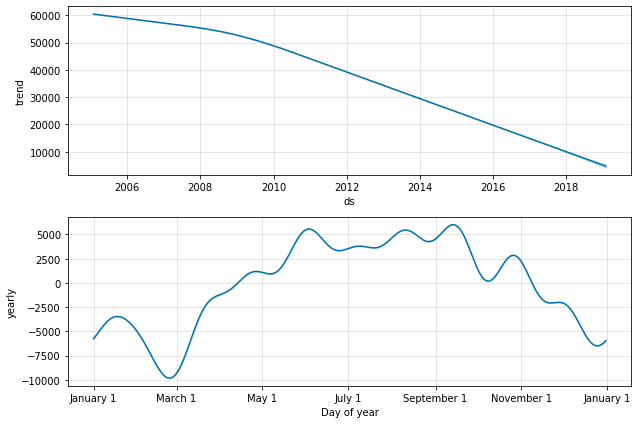

In [84]:
figure2 = model.plot_components(prediction2)

In [87]:
# Periods allows to make prediction of future(10 year in future in this case).

future10 = model.make_future_dataframe(periods = 3650)    
prediction10 = model.predict(future10)

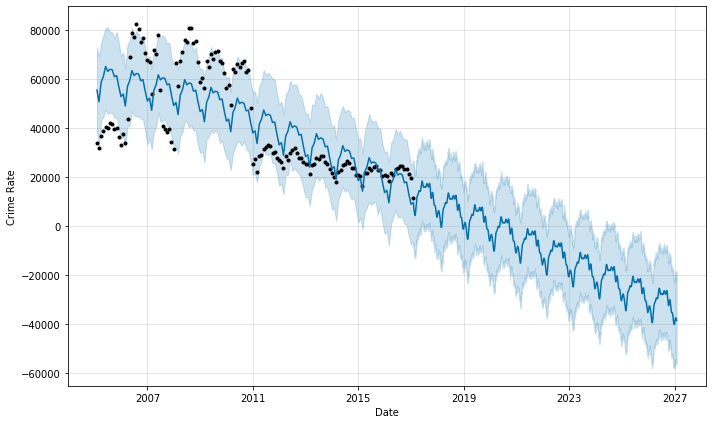

In [88]:
pred_plot10 = model.plot(prediction10, xlabel = "Date", ylabel = "Crime Rate")

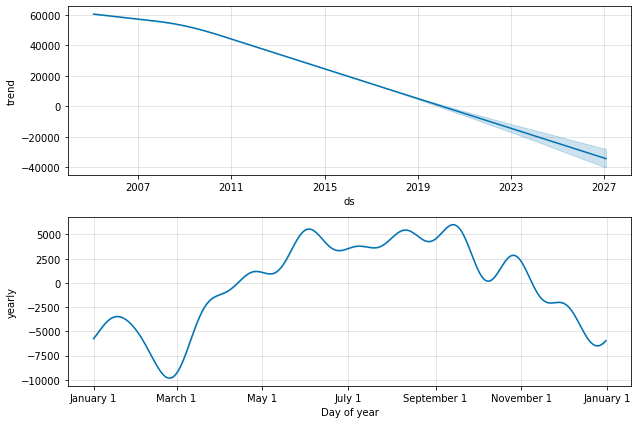

In [89]:
figure10 = model.plot_components(prediction10)

# <font color = "brown" > Hope you all like it !